In [12]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Conv3D, MaxPooling3D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
PATH = 'alanine_and_glycine_filtered'

In [3]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [4]:
train_0_dir = os.path.join(train_dir, 'alanine')  
train_1_dir = os.path.join(train_dir, 'glycine')  
validation_0_dir = os.path.join(validation_dir, 'alanine') 
validation_1_dir = os.path.join(validation_dir, 'glycine') 

In [5]:
num_0_tr = len(os.listdir(train_0_dir))
num_1_tr = len(os.listdir(train_1_dir))

num_0_val = len(os.listdir(validation_0_dir))
num_1_val = len(os.listdir(validation_1_dir))

total_train = num_0_tr + num_1_tr
total_val = num_0_val + num_1_val

In [6]:
print('total training alanine images:', num_0_tr)
print('total training glycine images:', num_1_tr)

print('total validation alanine images:', num_0_val)
print('total validation glycine images:', num_1_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training alanine images: 720
total training glycine images: 720
total validation alanine images: 360
total validation glycine images: 360
--
Total training images: 1440
Total validation images: 720


In [7]:
batch_size = 64
epochs = 15
IMG_HEIGHT = 25
IMG_WIDTH = 25
IMG_DEPTH = 25

In [8]:
train_image_generator = ImageDataGenerator(rescale=1./255) 
validation_image_generator = ImageDataGenerator(rescale=1./255) 

In [9]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH),
                                                           class_mode='binary')

Found 1440 images belonging to 2 classes.


In [10]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH),
                                                              class_mode='binary')

Found 720 images belonging to 2 classes.


In [11]:
sample_training_images, _ = next(train_data_gen)

In [25]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [26]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [16]:
model = Sequential([
    Conv3D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH ,3)),
    MaxPooling3D(),
    Conv3D(32, 3, padding='same', activation='relu'),
    MaxPooling3D(),
    Conv3D(64, 3, padding='same', activation='relu'),
    MaxPooling3D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

Instructions for updating:
Colocations handled automatically by placer.


In [17]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 25, 25, 25, 16)    1312      
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 12, 12, 12, 16)    0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 12, 12, 12, 32)    13856     
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 6, 6, 6, 32)       0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 6, 6, 6, 64)       55360     
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 3, 3, 3, 64)       0         
_________________________________________________________________
flatten (Flatten)            (None, 1728)              0         
__________

In [19]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
23/23 [==============================] - 29s 1s/step - loss: 0.2895 - acc: 0.9042 - val_loss: 4.6659e-05 - val_acc: 1.0000
Epoch 2/15
23/23 [==============================] - 29s 1s/step - loss: 3.8464e-06 - acc: 1.0000 - val_loss: 1.0960e-07 - val_acc: 1.0000
Epoch 3/15
23/23 [==============================] - 28s 1s/step - loss: 1.0960e-07 - acc: 1.0000 - val_loss: 1.0968e-07 - val_acc: 1.0000
Epoch 4/15
23/23 [==============================] - 28s 1s/step - loss: 1.0959e-07 - acc: 1.0000 - val_loss: 1.0938e-07 - val_acc: 1.0000
Epoch 5/15
23/23 [==============================] - 28s 1s/step - loss: 1.0952e-07 - acc: 1.0000 - val_loss: 1.0953e-07 - val_acc: 1.0000
Epoch 6/15
23/23 [==============================] - 28s 1s/step - loss: 1.0959e-07 - acc: 1.0000 - val_loss: 1.0960e-07 - val_acc: 1.0000
Epoch 7/15
23/23 [==============================] - 28s 1s/step - loss: 1.0965e-07 - acc: 1.0000 - val_loss: 1.0960e-07 - val_ac

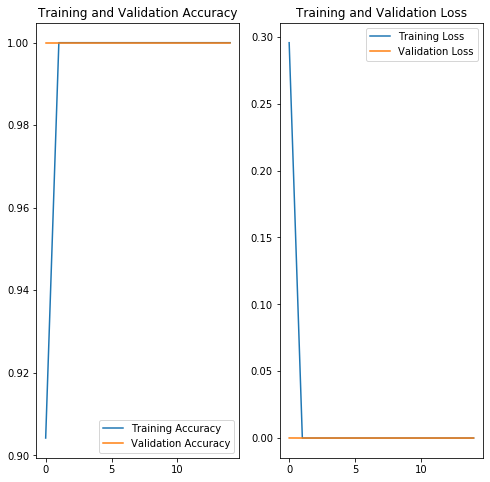

In [20]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [21]:
predict_class=model.predict_classes(sample_training_images)
print(predict_class[0:10].T)

[[0 1 0 1 1 1 0 1 1 0]]


In [22]:
model.predict_classes(sample_training_images[:1, :], verbose=0)

array([[0]])

In [24]:
json_string = model.to_json()
open('mnist_cnn_arch.json', 'w').write(json_string)
model.save_weights('mnist_cnn_weights.h5', overwrite=True)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------

데이터 변형을 통해 노이즈 대비

In [28]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [29]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH))

Found 1440 images belonging to 2 classes.


In [30]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

In [32]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

In [33]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 1440 images belonging to 2 classes.


In [35]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

In [36]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 1440 images belonging to 2 classes.


In [38]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

In [39]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH),
                                                     class_mode='binary')

Found 1440 images belonging to 2 classes.


In [41]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

In [42]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [43]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH),
                                                 class_mode='binary')

Found 720 images belonging to 2 classes.


In [44]:
model_new = Sequential([
    Conv3D(16, 3, padding='same', activation='relu', 
        input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH ,3)),
    MaxPooling3D(),
    Dropout(0.2),
    Conv3D(32, 3, padding='same', activation='relu'),
    MaxPooling3D(),
    Conv3D(64, 3, padding='same', activation='relu'),
    MaxPooling3D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [45]:
model_new.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_new.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_3 (Conv3D)            (None, 25, 25, 25, 16)    1312      
_________________________________________________________________
max_pooling3d_3 (MaxPooling3 (None, 12, 12, 12, 16)    0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 12, 16)    0         
_________________________________________________________________
conv3d_4 (Conv3D)            (None, 12, 12, 12, 32)    13856     
_________________________________________________________________
max_pooling3d_4 (MaxPooling3 (None, 6, 6, 6, 32)       0         
_________________________________________________________________
conv3d_5 (Conv3D)            (None, 6, 6, 6, 64)       55360     
_________________________________________________________________
max_pooling3d_5 (MaxPooling3 (None, 3, 3, 3, 64)       0         
__________

In [46]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
23/23 [==============================] - 29s 1s/step - loss: 0.7437 - acc: 0.5118 - val_loss: 0.6928 - val_acc: 0.5000
Epoch 2/15
23/23 [==============================] - 28s 1s/step - loss: 0.6940 - acc: 0.4854 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 3/15
23/23 [==============================] - 28s 1s/step - loss: 0.6931 - acc: 0.5056 - val_loss: 0.6933 - val_acc: 0.5000
Epoch 4/15
23/23 [==============================] - 28s 1s/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 5/15
23/23 [==============================] - 29s 1s/step - loss: 0.6932 - acc: 0.4993 - val_loss: 0.6930 - val_acc: 0.5000
Epoch 6/15
23/23 [==============================] - 28s 1s/step - loss: 0.6933 - acc: 0.4854 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 7/15
23/23 [==============================] - 29s 1s/step - loss: 0.6932 - acc: 0.5014 - val_loss: 0.6928 - val_acc: 0.5000
Epoch 8/15
23/23 [==============================] - 29s 1s/step - loss: 0.6933 - acc: 0.49

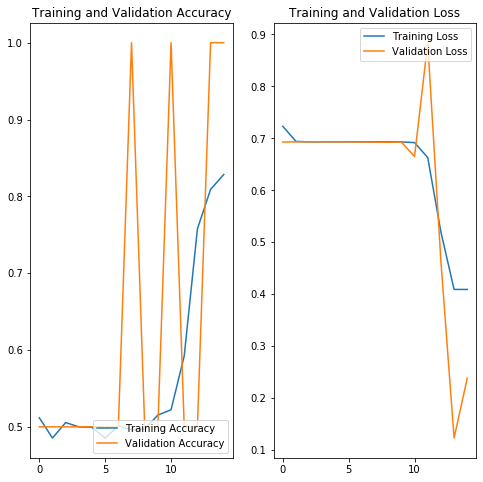

In [47]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

validation 데이터가 별로 없어서 acc가 요동치는건가?

In [48]:
predict_class=model.predict_classes(sample_training_images)
print(predict_class[0:100].T)

[[0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0
  0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1]]


In [49]:
model.predict_classes(sample_training_images[:1, :], verbose=0)

array([[0]])